### Student Information
Name: Kelvin 

Student ID: 107065424

GitHub ID: xavier2696

---

### Instructions

- First, you should attempt the **take home** exercises provided in the [notebook](https://github.com/omarsar/data_mining_lab/blob/master/news_data_mining.ipynb) we used for the first lab session. Attempt all the exercises, as it is counts towards the final grade of your first assignment (20%). 

- Then, download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read the specificiations of the dataset before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation steps learned in the [first lab session](https://github.com/omarsar/data_mining_lab) on **the new dataset**. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 30% of your grade!

- In addition to applying the same operations from the first lab, we are asking that you attempt the following tasks on the new sentiment dataset as well (40%):
    - Use your creativity and imagination to generate **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) on how you may go about doing this. Keep in mind that you are generating a matrix similar to the term-document matrix we implemented in our first lab session. However, the weights will be computed differently and should represent the TF-IDF value of each word per document as opposed to the word frequency.
    - Using both the TF-IDF and word frequency features, try to compute the **similarity** between random sentences and report results. Read the "distance simiilarity" section of the Data Mining textbook on what measures you can use here. [Cosine similarity](https://jamesmccaffrey.wordpress.com/2017/03/29/the-cosine-similarity-of-two-sentences/) is one of these methods but there are others. Try to explore a few of them in this exercise and report the differences in result. 
    - Lastly, implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Try to implement this using scikit-learn built in classifiers and use both the TF-IDF features and word frequency features to build two seperate classifiers. Refer to this [nice article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/) on how to build this type of classifier using scikit-learn. Report the classification accuracy of both your models. If you are struggling with this step please reach us on Slack as soon as possible.   


- Presentation matters! You are also expected to **tidy up your notebook** and attempt new data operations and techniques that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade. The idea of this exercise is to begin thinking of how you will program the concepts you have learned and the process that is involved. 


- After completing all the above tasks, you are free to remove this header block and **submit** your assignment following the guide provided in the [README.md](https://github.com/omarsar/dm_2018_hw_1/blob/master/README.md) file of the assignment's repository. 

In [2]:
### Begin Assignment Here!

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#imports
import pandas as pd
import helpers.data_mining_helpers as dmh

In [4]:
#load data into python array
sentiment_data_array = []
with open("sentiment_labelled_sentences_data/amazon_cells_labelled.txt","r") as amazon_data:
    sentiment_data_array += amazon_data.read().split('\n')
with open("sentiment_labelled_sentences_data/imdb_labelled.txt","r") as imdb_data:
    sentiment_data_array += imdb_data.read().split('\n')
with open("sentiment_labelled_sentences_data/yelp_labelled.txt","r") as yelp_data:
    sentiment_data_array += yelp_data.read().split('\n')

sentiment_data = dmh.sentiment_data_dictionary(sentiment_data_array)

In [5]:
# create dataframe
sentiment_data_df = pd.DataFrame.from_records(data = {"sentence":sentiment_data['sentences'], "score":sentiment_data['scores']})
print(sentiment_data_df[:10])

  score                                           sentence
0     0  So there is no way for me to plug it in here i...
1     1                        Good case, Excellent value.
2     1                             Great for the jawbone.
3     0  Tied to charger for conversations lasting more...
4     1                                  The mic is great.
5     0  I have to jiggle the plug to get it to line up...
6     0  If you have several dozen or several hundred c...
7     1        If you are Razr owner...you must have this!
8     0                Needless to say, I wasted my money.
9     0                   What a waste of money and time!.


In [10]:
#data exploration and data operation
#check for missing values
sentiment_data_df.isnull().apply(lambda x: dmh.check_missing_values(x))
#there are no missing values in the dataset, the sentiment_data_dictionary method in the helpers file will
#ignore any rows that contain either a sentence none value or a score none value

#in this case I think it is better to ignore the rows that contain a none value because there is no way to generate
#a sentence if it is missing and if we try to estimate a 0 or 1 value for the score it will just contaminate the data

score       The amoung of missing records is: 0
sentence    The amoung of missing records is: 0
dtype: object

In [7]:
#check if there are duplicated rows and remove them
duplicates = sum(sentiment_data_df.duplicated('sentence'))
print('Number of rows before cleaning: %d' % len(sentiment_data_df))
print('Duplicated rows: %d' % duplicates)
if duplicates > 0:
    sentiment_data_df.drop_duplicates(keep=False, inplace=True)
    
print('Number of rows after cleaning: %d' % len(sentiment_data_df))

Number of rows before cleaning: 3000
Duplicated rows: 17
Number of rows after cleaning: 2966


In [11]:
#sampling
sentiment_data_sample = sentiment_data_df.sample(n=500, random_state=26)

AxesSubplot(0.125,0.125;0.775x0.755)


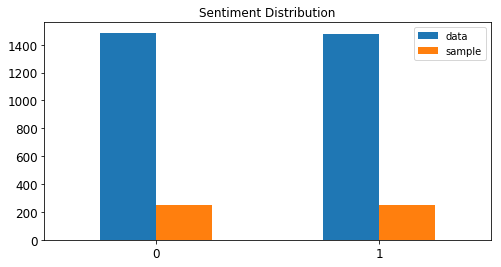

In [12]:
#show the sampling and actual data counts in a bar graph
sample_counts = sentiment_data_sample.score.value_counts()
actual_counts = sentiment_data_df.score.value_counts()

combined_data_frame = pd.DataFrame({'data': actual_counts,
                    'sample': sample_counts})

print(combined_data_frame.plot.bar(title = 'Sentiment Distribution', rot = 0, fontsize = 12, figsize = (8,4), tick_label = ['negative', 'positive']))

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\xavie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
#feature creation
#unigrams
sentiment_data_df['unigrams'] = sentiment_data_df['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
#feature subset selection
count_vect = CountVectorizer()
sentiment_sentences_counts = count_vect.fit_transform(sentiment_data_df.sentence)
print(sentiment_sentences_counts.shape)
count_vect.get_feature_names()[0:10]

(2966, 5157)


['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']